## Importing Libraries
I have imported all the necessary libraries below to help us with the analysis and determine autopay and non-autopay users CLV (Customer Lifetime Value)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Enhancing the Churn DataFrame
We are going to start with Year 2 for our customer churn rate analysis and will carry on for 8 years time period. So, for the optimised churn data, we are considering 0 churn rate for Year 1 (starting Year 2) and as we do not need last year term in calculating the churn rate as it will go towards Year 9, we will remove it.

In [4]:
churn = pd.DataFrame(
    {
        "autopay": [0,0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059],
        "no_autopay": [0,0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096],
    }
)

## New Churn DataFrame (churn8)
The churn8 DataFrame will be made keeping the 8 years duration in mind. For the calculation of CLV, I am assuming that we will need to calculate factors like service cost, marketing cost and profits on a monthly basis keeping monthly discount rate in mind. Therefore, the churn8 DataFrame will be made keeping all the months in mind, so, the DataFrame will have a shape of (96,2). Initially, an empty array was made using numpy function and then converted into a DataFrame.

In [5]:
empty_array = np.zeros(shape = (96,2))
churn8 = pd.DataFrame(empty_array, columns = ["autopay", "no_autopay"])

## Updating the DataFrame with churn values
In the first step, I created an empty list with the range and length of churn DataFrame. After that, I initiated an Index which will further be update with the churn values for respective months into the churn8 DataFrame. Finally, using the loc function, the churn values were updated into the list location inside the churn8 DataFrame. The final DataFrame has churn value for all the months for all 8 years.

In [6]:
a_list = list(range(len(churn)))
multiplied_list = [element * 12 for element in a_list]
multiplied_list

churn8.loc[multiplied_list] = churn.values

### List assumptions that apply to both autopay and non-autopay customers

## Assumptions
As the initial RMR is almost same for both autopay and no-autopay customers, we will consider RMR same for both of them. Keeping the general rate increase in mind, I decided to take monthly revenue as 40 (given) for the First Year and kept on icreasing it by annual growth rate (given) for every year. The monthly discount rate was calculated using the formula (1 + annual discount rate) ^ (1/12) - 1. Cost of Service and the Marketing Cost is calculated as 15% and 5% of the monthly revenue respectively. Number of years will be 8 years. All the varaibles were defined for the calculation of CLV.

In [8]:
# list your assumptions here
monthly_revenue = 40
annual_growth = 0.03
annual_discount_rate = 0.1
monthly_discount_rate = (1+annual_discount_rate)**(1/12)-1
cost_service = 0.15*monthly_revenue
marketing_cost = 0.05*monthly_revenue
nr_years = 8

### Calculate CLV for non-autopay customers

## Retention

Retention revenue was created by using numoy array. The numpy array had the values of the ptobability of peoplebeing active ( 1 - churn values (from churn8). Furthermore, cumprod function was used to find out the cumulative products of the churn.

In [9]:
# create an array with shape (96,) with retention rates 
# _nap stands for 'non-autopay'

retention_nap = np.array(1-churn8.iloc[:, 1])
retention_nap = retention_nap.cumprod()

## Revenue 

revenue for every month was calculated by creating an empty array and running a loop over it. The logic defined increased the monthly revenue at the end of the Year and kept it same for the next 12 months.

In [10]:
array0 = np.ones(96,)

In [11]:
for i in range(len(array0)):
    if i in range(0,12):
        array0[i] = 40
        continue
    if i%12 == 0: 
        array0[i] = array0[i-1] * (1 + annual_growth)
    else:
        array0[i] = array0[i-1]
        


## Present Value of the Expected Profit and CLV
As the discount rate will apply on the profit on the monthly basis, I created an array of size (96,) and ran a for loop over it defining the implication of the monthly discounted rate on the expected profit and updated the monthly values inside the array which we created. The CLV of the non-autopay users were calculated using the cumsum function which gave us the final customer lifetime value of a customer (8 years term) who does not use autopay feature.

In [13]:
revenues_nap = array0
service_nap = 0.15*revenues_nap
marketing_nap = 0.05*revenues_nap
profit_nap = revenues_nap - service_nap - marketing_nap
expected_profit_nap = retention_nap * profit_nap

pv_expected_profit_nap = np.ones(96,)
for i in range(len(expected_profit_nap)):
    pv_expected_profit_nap[i] = expected_profit_nap[i]/(1+monthly_discount_rate)**(i+1)


pv_expected_profit_nap = pv_expected_profit_nap# present value of expected profits
clv_nap = np.cumsum(pv_expected_profit_nap)

### Calculate CLV for autopay customers

The CLV for autopay users was calculated just like the non-autopay users. The only difference being, for the retention_ap, we used the other column which had the retention rates for evert months of autopay users.

In [14]:
# created an array with shape (96,) with retention rates 
# _ap stands for 'autopay'

retention_ap = np.array(1-churn8.iloc[:, 0])
retention_ap= retention_ap.cumprod()

In [15]:
array1 = np.ones(96,)

In [16]:
for i in range(len(array1)):
    if i in range(0,12):
        array1[i] = 40
        continue
    if i%12 == 0: 
        array1[i] = array1[i-1] * (1 + annual_growth)
    else:
        array1[i] = array1[i-1]

In [17]:
revenues_ap = array1
service_ap = 0.15*revenues_ap
marketing_ap = 0.05*revenues_ap
profit_ap = revenues_ap - service_ap - marketing_ap
expected_profit_ap = retention_ap * profit_ap

pv_expected_profit_ap = np.ones(96,)
for i in range(len(expected_profit_ap)):
    pv_expected_profit_ap[i] = expected_profit_ap[i]/(1+monthly_discount_rate)**(i+1)


pv_expected_profit_ap = pv_expected_profit_ap# present value of expected profits
clv_ap = np.cumsum(pv_expected_profit_ap)


In [35]:
time = np.arange(1,97)

homealarm = pd.DataFrame(
    {"Time": time, "autopay": clv_ap, "no_autopay": clv_nap}
)

homealarm.iloc[-1]

Time            96.000000
autopay       1803.660201
no_autopay    1553.722933
Name: 95, dtype: float64

CLV for AutoPay Users: 1803.660201

CLV for Non-AutoPay Users: 1553.722933

### Create a line graph of CLV for both autopay and non-autopay customers 

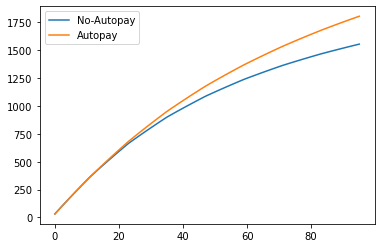

In [30]:
# created a single plot with 2-lines
a = plt.plot(homealarm["no_autopay"], label="No-Autopay")
a = plt.plot(homealarm["autopay"], label="Autopay")
plt.legend()

### Create a line graph of the retention rate for both autopay and non-autopay customer 

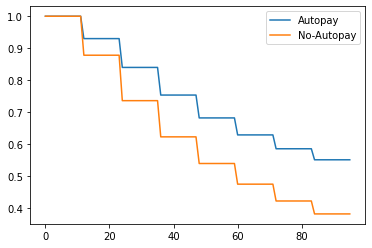

In [31]:
# created a single plot with 2-lines
b = plt.plot(retention_ap, label="Autopay")
b = plt.plot(retention_nap, label="No-Autopay")
plt.legend()

### Calculate the maximum amount to spend on autopay incentives

In [21]:
max_pay = homealarm["autopay"][95] - homealarm["no_autopay"][95]
print(f"Maxium amount to spend on autopay incentives is {max_pay.round(2)}")

Maxium amount to spend on autopay incentives is 249.94


### Suggested marketing actions

Suggest two marketing actions Door Bell should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

1. Door Bell can offer free 30 USD worth of days in its subscription for non-autopay customers who switch to autopay cutomers. For every year they complete under the autopay contract, they will recieve suitable number of days free corresponding to the dollar value of 30 USD. This strategy will help us in convincing the non-autopay customers to switch to autopay customers and also help us in retaining them. The total cost for this marketing campaign will come around to be (30 X 8) = 240 USD, which is less then the autopay incentives.

2. Door Bell can also offer special priviledges to autopay customers which can cost less that 249.94 USD. For instance, Home Alarm can offer an additional feature into its alarm system which can may offer its client 24/7 survilliece by the employyes of Home Alarm. This gives additional security to its users. This additional feature might be able to convince non-autopay customer to switch to autopay customers.